Found 3028 images belonging to 5 classes.
Found 753 images belonging to 5 classes.
Class labels: {'Crown and Root Rot': 0, 'Healthy Wheat': 1, 'Leaf Rust': 2, 'Non-Wheat': 3, 'Wheat Loose Smut': 4}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,214,184 (16.08 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
74/95 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5949 - loss: 1.0231

C:\Users\sn955\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


95/95 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.6211 - loss: 0.9644 - val_accuracy: 0.8088 - val_loss: 0.5186
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 83s 876ms/step - accuracy: 0.8015 - loss: 0.5407 - val_accuracy: 0.8659 - val_loss: 0.3822
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 83s 872ms/step - accuracy: 0.8256 - loss: 0.4593 - val_accuracy: 0.8752 - val_loss: 0.3437
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8467 - loss: 0.4061 - val_accuracy: 0.8911 - val_loss: 0.3125
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 82s 868ms/step - accuracy: 0.8725 - loss: 0.3432 - val_accuracy: 0.9070 - val_loss: 0.2848
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 84s 882ms/step - accuracy: 0.8975 - loss: 0.2782 - val_accuracy: 0.9110 - val_loss: 0.2779
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 84s 881ms/step - accuracy: 0.9110 - loss: 0.2624 - val_accuracy: 0.9097 - val_loss: 0.2604
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 84s 883ms/step - accuracy: 0.9116 - loss: 0.2509 - val_accuracy: 0.9270 - 

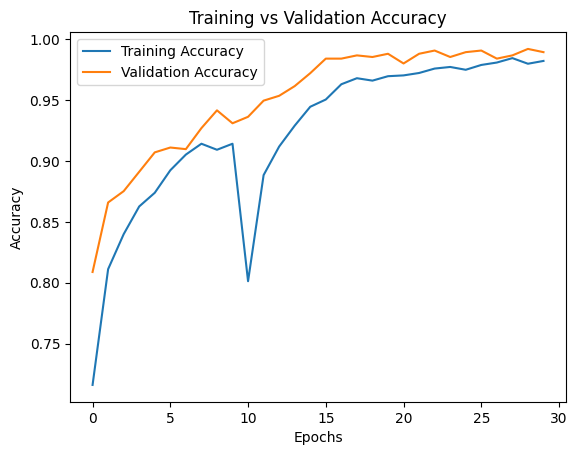

In [2]:
# Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Step 2: EfficientNet Preprocessing
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\sn955\OneDrive\Desktop\game-master\Wheat-Disease-Detection-\Images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

valid_generator = train_datagen.flow_from_directory(
    r'C:\Users\sn955\OneDrive\Desktop\game-master\Wheat-Disease-Detection-\Images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print("Class labels:", train_generator.class_indices)

# Step 3: Build Model
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # Freeze first

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Step 4: Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Step 5: Train Model (initial warm-up)
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stopping, checkpoint]
)

# Step 6: Fine-tune (unfreeze last few layers)
base_model.trainable = True

# Freeze first 100 layers and unfreeze rest
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[early_stopping, checkpoint]
)


# Step 8: Plot Accuracy
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [3]:
print("Class labels:", train_generator.class_indices)


Class labels: {'Crown and Root Rot': 0, 'Healthy Wheat': 1, 'Leaf Rust': 2, 'Non-Wheat': 3, 'Wheat Loose Smut': 4}


In [4]:
 #Step 7: Save the final model
model.save("wheat_disease_efficientnetb0_finetuned1.keras")


In [ ]:
from keras.models import load_model

model = load_model(r'C:\Users\sn955\OneDrive\Desktop\game-master\Wheat-Disease-Detection-\wheat_disease_efficientnetb0_finetuned1.keras')  # if you saved it


In [16]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

# Load and preprocess image
img_path = r'C:\Users\sn955\Downloads\download.jpeg'  # your test image
img = image.load_img(img_path, target_size=(224, 224))  # same size as training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Important!


In [17]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted class: [3]


In [18]:
class_names = ['Crown and Root Rot', 'Healthy Wheat', 'Leaf Rust', 'Non-Wheat' , 'Wheat Loose Smut']  # <-- your class names
print("Predicted label:", class_names[predicted_class[0]])


Predicted label: Non-Wheat


In [19]:
print(predictions)  # See the probabilities


[[9.2710492e-05 9.1512491e-05 1.2456349e-04 9.9964237e-01 4.8766178e-05]]
